# Import csv files

Start by connecting gdrive to colab and importing pandas module.

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load in data sources. *(I'm not sure how this will work if other people run it because the gdrive paths are unique to my account.)*

In [ ]:
sampleSubmission = pd.read_csv('/content/drive/MyDrive/University of Toronto/7. Winter Semester 2023-24/APS360/APS360 Group Project/1. Project Proposal (DUE: Feb 12, EOD)/Data/sample_submission.csv')
testEssays = pd.read_csv('/content/drive/MyDrive/University of Toronto/7. Winter Semester 2023-24/APS360/APS360 Group Project/1. Project Proposal (DUE: Feb 12, EOD)/Data/test_essays.csv')
trainEssays = pd.read_csv('/content/drive/MyDrive/University of Toronto/7. Winter Semester 2023-24/APS360/APS360 Group Project/1. Project Proposal (DUE: Feb 12, EOD)/Data/train_essays.csv')
trainPrompts = pd.read_csv('/content/drive/MyDrive/University of Toronto/7. Winter Semester 2023-24/APS360/APS360 Group Project/1. Project Proposal (DUE: Feb 12, EOD)/Data/train_prompts.csv')

#Exploratory Data Analysis
Preview the content of each dataframe.


## Sample Submission DF

In [ ]:
sampleSubmission.shape

(3, 2)

In [ ]:
sampleSubmission.head() #what is 'generated'?

,id,generated
0,0000aaaa,0.1
1,1111bbbb,0.9
2,2222cccc,0.4


From comp page: sample_submission.csv - A submission file in the correct format.

##Test Essays DF

In [ ]:
testEssays.shape

(3, 3)

In [ ]:
testEssays

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


it's a dummy set, we have to make our own if we want to test our code or use the kaggle submission

##Train Essays DF

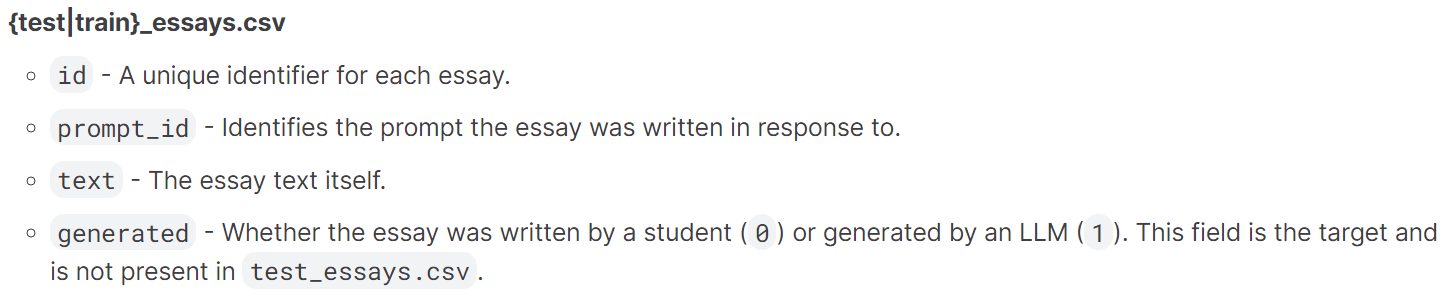

In [ ]:
anyNull = trainEssays.isnull().any().any()
print("Null Values?:", anyNull)
print("Shape:", trainEssays.shape)

Null Values?: False
Shape: (1378, 4)


In [ ]:
trainEssays.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [ ]:
promptIds_train = set(trainEssays['prompt_id'])
print(promptIds_train)

{0, 1}


In [ ]:
#get list of  values in the 'generated' column of data
genVals_train = set(trainEssays['generated'])
print(genVals_train)

{0, 1}


Because 'generated' is a binary variable, it likely represents whether or not the essay was generated by an AI model or not.

In [ ]:
print(trainEssays['text'][0])

Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.

In like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "

I want to figure out how long the essays in the training set are. I'll collect basic information like the mean, median, range, etc. on the essay lengths. I will augment the original dataframe by adding columns for text length in both characters and words.

In [ ]:
characterLengths_train = trainEssays['text'].str.len()
wordLengths_train = trainEssays['text'].str.split().str.len()
trainEssays['numChars'] = characterLengths_train
trainEssays['numWords'] = wordLengths_train
trainEssays.head()

,id,prompt_id,text,generated,numChars,numWords
0,0059830c,0,Cars. Cars have been around since they became ...,0,3289,584
1,005db917,0,Transportation is a large necessity in most co...,0,2738,462
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,4428,744
3,00940276,0,How often do you ride in a car? Do you drive a...,0,4013,686
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,4698,871


In [ ]:
trainEssays[['numChars','numWords']].describe()

,numChars,numWords
count,1378.000000,1378.000000
mean,3169.050798,556.124093
std,920.588198,159.920005
min,1356.000000,235.000000
25%,2554.250000,447.000000
50%,2985.500000,525.000000
75%,3623.750000,639.000000
max,8436.000000,1360.000000


Notes:
*   Use this information to generate AI essays.
*   Should look into things like word/character count thresholds and impacts on our model.
*   If using these to guide our test data set creation, should figure out if we aim for essays around the mean or have a range of them.
*   The competition suggests generating essays to supplement the training set.



##Train Prompts DF

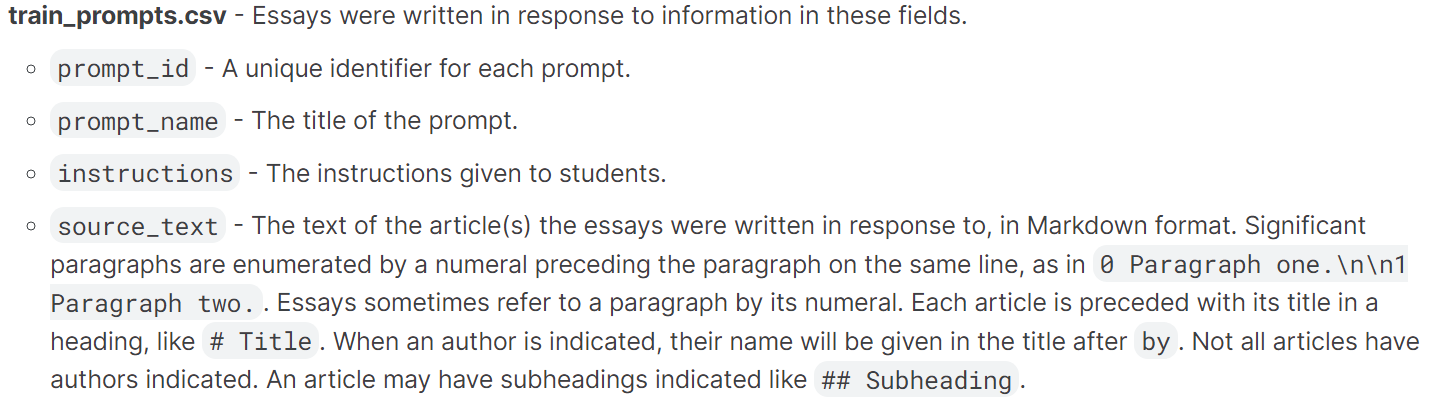

In [ ]:
anyNull = trainPrompts.isnull().any().any()
print("Null Values?:", anyNull)
print("Shape:", trainPrompts.shape)

Null Values?: False
Shape: (2, 4)


In [ ]:
trainPrompts

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [ ]:
print(trainPrompts['instructions'][0])
print(trainPrompts['source_text'][0])

Write an explanatory essay to inform fellow citizens about the advantages of limiting car usage. Your essay must be based on ideas and information that can be found in the passage set. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your essay in the space provided.
# In German Suburb, Life Goes On Without Cars by Elisabeth Rosenthal

1 VAUBAN, Germany—Residents of this upscale community are suburban pioneers, going where few soccer moms or commuting executives have ever gone before: they have given up their cars.

2 Street parking, driveways and home garages are generally forbidden in this experimental new district on the outskirts of Freiburg, near the French and Swiss borders. Vauban’s streets are completely “car-free”—except the main thorou

these are the articles that the students were given as prompts to write their essays for either of the two essay types in the training set. We can use these to feed a LLM to create essays for our training set and inspire prompts for the creation of our test set if we choose to do that.
